In [ ]:
!pip install ibm_db
import ibm_db

In [ ]:
dsn_hostname = "ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "nyh62880"        # e.g. "abc12345"
dsn_pwd = "E9YhlPk0eV6IqMN4"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "31321"                # e.g. "32733"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"



In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud;PORT=31321;PROTOCOL=TCPIP;UID=nyh62880;PWD=E9YhlPk0eV6IqMN4;SECURITY=SSL;


In [ ]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  nyh62880 on host:  ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud


In [ ]:
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0800
DB_NAME:    BLUDB


In [ ]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME)
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.05.0800
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


In [ ]:
#ibm_db.close(conn)

In [ ]:
dropQuery = "drop table CARDIO_TRAIN2"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

Exception: ignored

In [ ]:
RENAME = "RENAME table CARDIO_TRAIN3 TO CARDIO_TRAIN "
RENAMEStmt = ibm_db.exec_immediate(conn, RENAME)

Exception: ignored

In [ ]:
#1. Retrieve how many rows from the table
query = "SELECT COUNT(ID) FROM CARDIO_TRAIN"

results = ibm_db.exec_immediate(conn, query)
ibm_db.fetch_both(results)


{'1': 70000, 0: 70000}

In [ ]:
#count how many people in the experiment got the illness from 70K cases
query1 = "SELECT COUNT(CARDIO) FROM CARDIO_TRAIN WHERE CARDIO=1"
results = ibm_db.exec_immediate(conn,query1 )
ibm_db.fetch_both(results)

{'1': 34979, 0: 34979}

In [ ]:
#How many women and men in the experiment (We count Gender = 1 and Gender = 2)
query2 = "SELECT COUNT(GENDER) FROM CARDIO_TRAIN WHERE GENDER = 1 "
results = ibm_db.exec_immediate(conn,query2 )
ibm_db.fetch_both(results)

{'1': 45530, 0: 45530}

In [ ]:
#Sort data descendingly using AP_HI column, limiting to 10 results. Count how many percent of the illness people in these 10 samples.
#(Retrieve 10 results from the table and sort descendingly by AP_HI, then count how many cases where CARDIO=1)
query3 = "SELECT AP_HI, CARDIO FROM CARDIO_TRAIN ORDER BY AP_HI DESC LIMIT 10"
results = ibm_db.exec_immediate(conn,query3 )


count = 0
while ibm_db.fetch_row(results) != False:
  ap_hi = int(ibm_db.result(results, "AP_HI"))
  cardio = int(ibm_db.result(results,"CARDIO"))
  if cardio == 1 :
    count+=1
  print(" AP_HI:", ap_hi, "CARDIO:", cardio)

print("there are {}/10 cases got illness.".format(count))



 AP_HI: 16020 CARDIO: 1
 AP_HI: 14020 CARDIO: 1
 AP_HI: 14020 CARDIO: 0
 AP_HI: 14020 CARDIO: 1
 AP_HI: 14020 CARDIO: 1
 AP_HI: 13010 CARDIO: 1
 AP_HI: 13010 CARDIO: 0
 AP_HI: 11500 CARDIO: 1
 AP_HI: 11020 CARDIO: 1
 AP_HI: 2000 CARDIO: 1
there are 8/10 cases got illness.


In [ ]:
#Retrieve data of patient who has weight more than average weight from the table, limiting the result to 10 rows.
#How many percent of chance do they got the vascular problem.

query4 = "SELECT WEIGHT, CARDIO FROM CARDIO_TRAIN \
WHERE WEIGHT >( SELECT AVG(WEIGHT) FROM CARDIO_TRAIN)\
ORDER BY WEIGHT DESC LIMIT 10 "
results = ibm_db.exec_immediate(conn,query4 )

count = 0
while ibm_db.fetch_row(results) != False:
  weight = float(ibm_db.result(results, "WEIGHT"))
  cardio = int (ibm_db.result(results, "CARDIO"))
  if cardio == 1:
    count +=1
  print("Weight: ", weight , "Cardio: ", cardio)
print("there are {}/10 cases got illness.".format(count))

Weight:  200.0 Cardio:  0
Weight:  200.0 Cardio:  1
Weight:  183.0 Cardio:  1
Weight:  181.0 Cardio:  1
Weight:  180.0 Cardio:  1
Weight:  180.0 Cardio:  1
Weight:  180.0 Cardio:  1
Weight:  180.0 Cardio:  1
Weight:  178.0 Cardio:  0
Weight:  178.0 Cardio:  1
there are 8/10 cases got illness.


In [ ]:
#Query to get 10 oldest people in the table. How many of them got vascular problem
query5 = "SELECT AGE, CARDIO FROM CARDIO_TRAIN ORDER BY AGE DESC LIMIT 10"
results = ibm_db.exec_immediate(conn,query5 )

count = 0
while ibm_db.fetch_row(results) != False:
  age = int(ibm_db.result(results, "AGE"))
  cardio = int(ibm_db.result(results, "CARDIO"))
  if cardio == 1:
    count += 1
  print("AGE: ", age , "CARDIO: ", cardio)
print("there are {}/10 cases got illness.".format(count))

In [ ]:
#Write code to get 10 people whose CHOLESTEROL=3.How many people got heart problem.
query6 = "SELECT CHOLESTEROL, CARDIO FROM CARDIO_TRAIN WHERE CHOLESTEROL = 3 LIMIT 10"
results = ibm_db.exec_immediate(conn,query6)

count = 0

while ibm_db.fetch_row(results) != False:
  chol = int(ibm_db.result(results, "CHOLESTEROL"))
  cardio = int(ibm_db.result(results, "CARDIO"))
  if cardio == 1:
    count +=1
  print("Cholesterol: ", chol , "CARDIO: ", cardio)
print("there are {}/10 cases got illness.".format(count))

Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  0
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
Cholesterol:  3 CARDIO:  1
there are 9/10 cases got illness.


In [ ]:
#: Get 10 people who smoke from the table. How many of they who got heart disease.
query7 = "SELECT SMOKE, CARDIO FROM CARDIO_TRAIN WHERE SMOKE = 1 LIMIT 10 "
results = ibm_db.exec_immediate(conn,query7)

count = 0

while ibm_db.fetch_row(results) != False:
  smoke = int(ibm_db.result(results, "SMOKE"))
  cardio = int(ibm_db.result(results, "CARDIO"))
  if cardio == 1:
    count +=1
  print("Smoke: ", smoke, "Cardio: ", cardio)
print("there are {}/10 cases got illness.".format(count))


Smoke:  1 Cardio:  0
Smoke:  1 Cardio:  0
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  0
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  1
Smoke:  1 Cardio:  1
there are 7/10 cases got illness.


In [ ]:
#Get 10 people who practice exercise in the table. How many people got the disease.
query8 = "SELECT ACTIVE, CARDIO FROM CARDIO_TRAIN WHERE ACTIVE = 1 LIMIT 10"
results = ibm_db.exec_immediate(conn,query8)

count =0
while ibm_db.fetch_row(results) != False:
  active = int(ibm_db.result(results, "ACTIVE"))
  cardio = int(ibm_db.result(results, "CARDIO"))
  if cardio == 1 :
    count +=1
  print("Active: ", active , "Cardio: ", cardio)
print("there are {}/10 cases got illness.".format(count))



Active:  1 Cardio:  0
Active:  1 Cardio:  1
Active:  1 Cardio:  1
Active:  1 Cardio:  0
Active:  1 Cardio:  1
Active:  1 Cardio:  0
Active:  1 Cardio:  0
Active:  1 Cardio:  0
Active:  1 Cardio:  0
Active:  1 Cardio:  0
there are 3/10 cases got illness.


In [ ]:
#ibm_db.close(conn)

In [ ]:
import pandas as pd
import ibm_db_dbi
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)
#query statement to retrieve all rows in CARDIO_TRAIN table
selectQuery = "select * from CARDIO_TRAIN"
#retrieve the query results into a pandas dataframe
df = pd.read_sql(selectQuery, pconn)
df.to_csv("CARDIO_TRAIN.csv")



<ipython-input-33-9425b8dcb700>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(selectQuery, pconn)


In [ ]:
df = pd.read_csv("CARDIO_TRAIN.csv")
df.head(10)

,Unnamed: 0,COLUMN_0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,5,5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,6,6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,7,7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
8,8,8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,9,9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,COLUMN_0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,34999.500000,49972.419900,52.840671,1.349571,164.359229,74.205686,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,20207.403759,28851.302323,6.766774,0.476838,8.210126,14.395761,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,17499.750000,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,34999.500000,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,52499.250000,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull()

,Unnamed: 0,COLUMN_0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#correlation : moi tuong quan
corr = df.corr().CARDIO.sort_values(ascending=False)
corr

CARDIO         1.000000
AGE            0.237985
CHOLESTEROL    0.221147
WEIGHT         0.181659
GLUC           0.089307
AP_LO          0.065719
AP_HI          0.054475
GENDER         0.008109
Unnamed: 0     0.003800
COLUMN_0       0.003800
ID             0.003799
ALCO          -0.007330
HEIGHT        -0.010821
SMOKE         -0.015486
ACTIVE        -0.035653
Name: CARDIO, dtype: float64

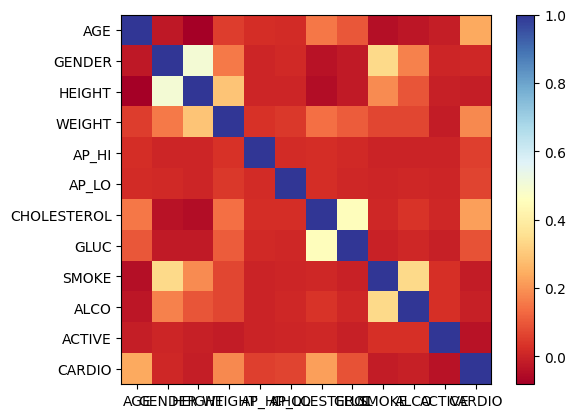

In [ ]:
import matplotlib.pyplot as plt
corr = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].corr()

plt.imshow(corr, cmap ="RdYlBu")

plt.colorbar()

plt.xticks(range(len(corr)), corr.columns)

plt.yticks(range(len(corr)), corr.index)

plt.show()


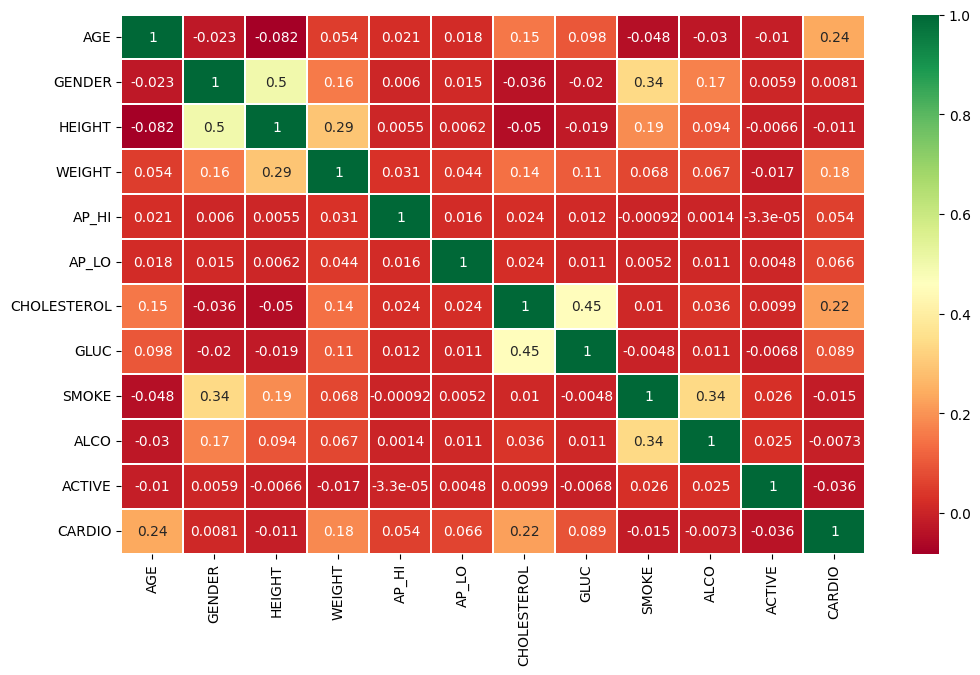

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

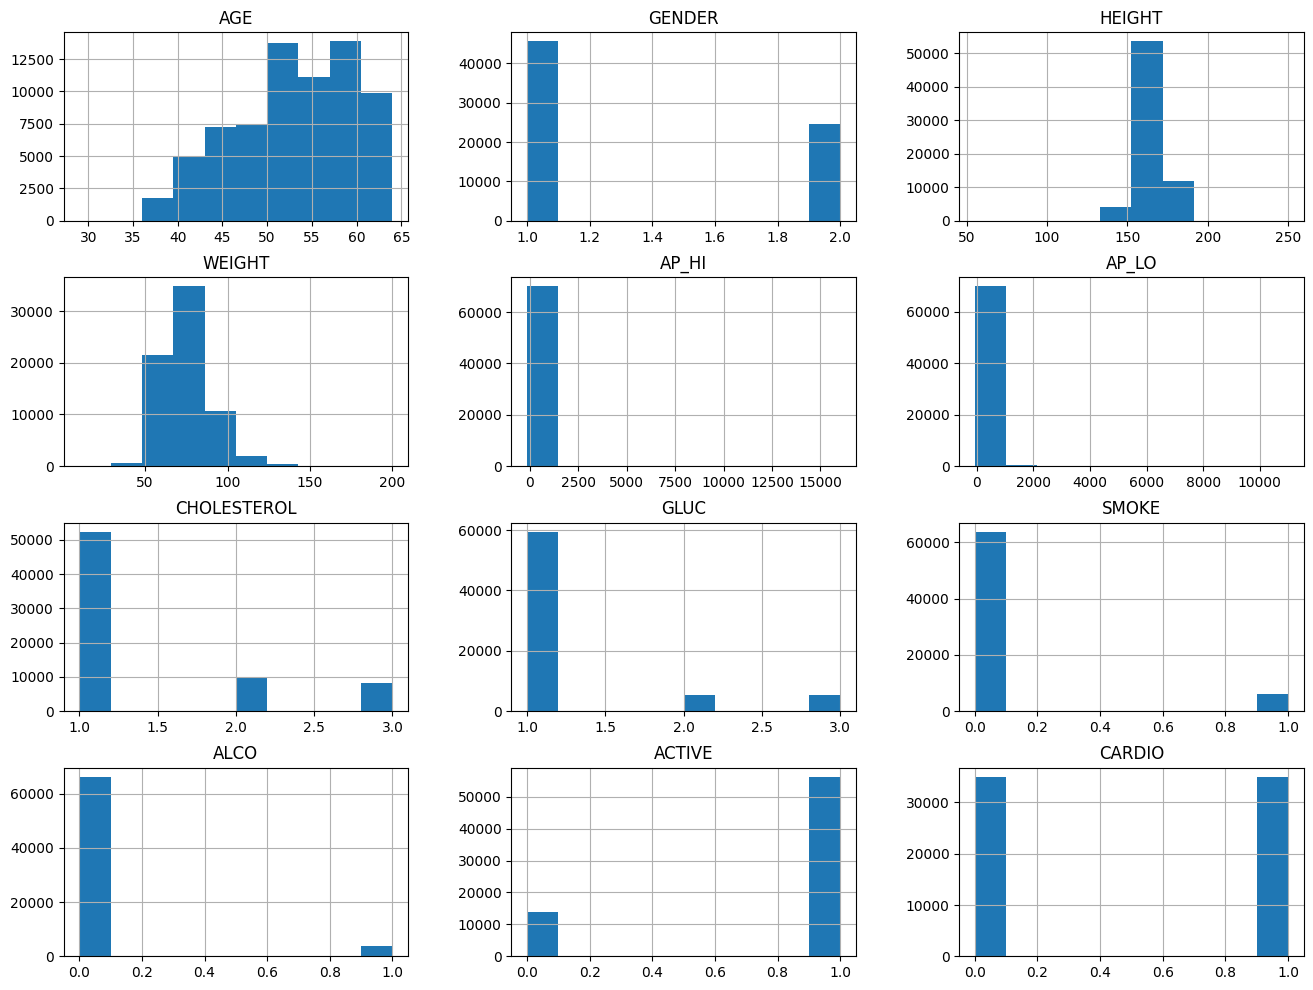

In [ ]:
df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].hist(figsize=[16, 12])
plt.show()


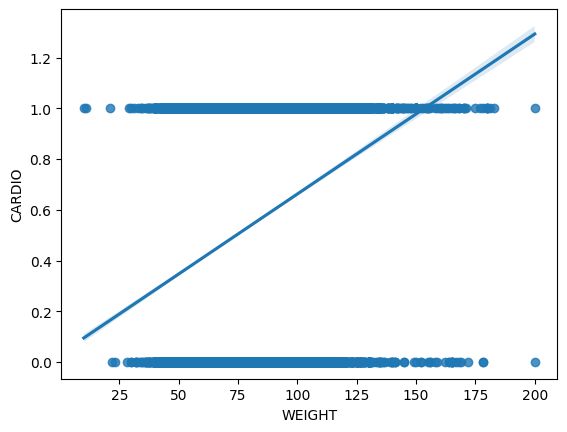

In [ ]:
sns.regplot(x = "WEIGHT",
 y = "CARDIO",
 data = df,
 dropna = True)

ax.set(xlabel='WEIGHT', ylabel='CARDIO')
plt.show()

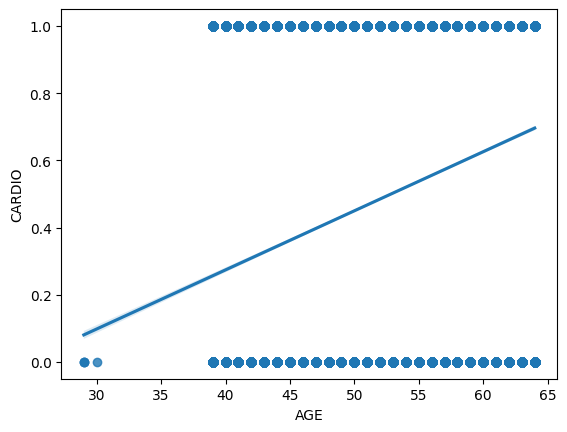

In [ ]:
sns.regplot(x = "AGE",
 y = "CARDIO",
 data = df,
 dropna = True)

ax.set(xlabel='AGE', ylabel='CARDIO')
plt.show()

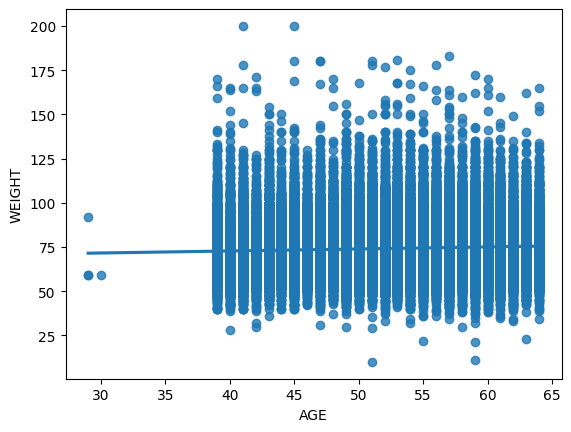

In [ ]:
sns.regplot(x = "AGE",
 y = "WEIGHT",
 data = df,
 dropna = True)

ax.set(xlabel='AGE', ylabel='WEIGHT')
plt.show()

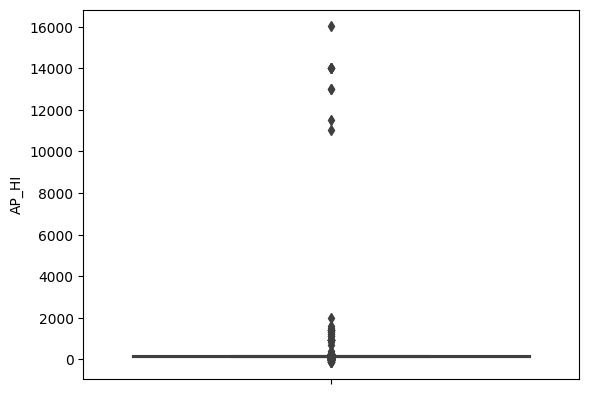

In [ ]:
sns.boxplot(y= "AP_HI", data = df)
plt.show()

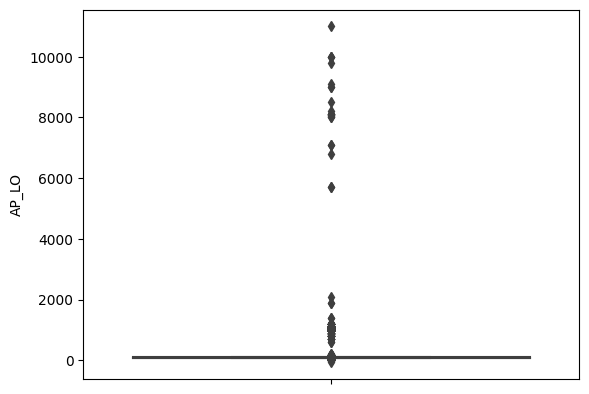

In [ ]:
sns.boxplot(y= "AP_LO", data = df)
plt.show()


In [ ]:
first_quan, third_quan = df.AP_HI.quantile([0.25, 0.75])
IQR = third_quan - first_quan
max = third_quan + 1.5 * IQR
min = first_quan - 1.5 * IQR

print("maximum: ",max, "minimum: ",min )
df.loc[df.AP_HI>max,'AP_HI'] = max
df.loc[df.AP_HI<min,'AP_HI'] = min



maximum:  170.0 minimum:  90.0


<function matplotlib.pyplot.show(close=None, block=None)>

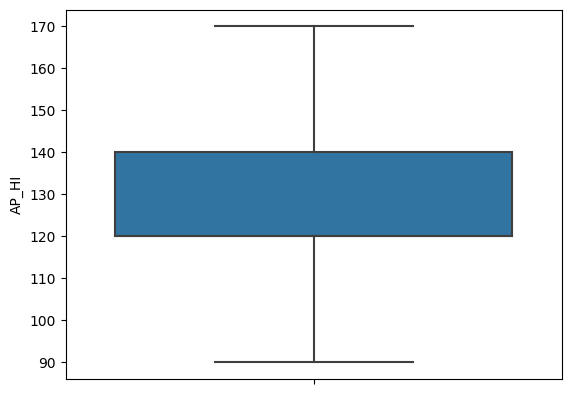

In [ ]:
sns.boxplot(y= "AP_HI", data = df)
plt.show

In [ ]:
first_quan,third_quan = df.AP_LO.quantile([0.25, 0.75])
iqr = third_quan - first_quan
max = third_quan + 1.5*iqr
min = first_quan - 1.5*iqr
print("maximum:",max,"minimum:",min)
df.loc[df.AP_LO>max,'AP_LO'] = max
df.loc[df.AP_LO<min,'AP_LO'] = min

maximum: 105.0 minimum: 65.0


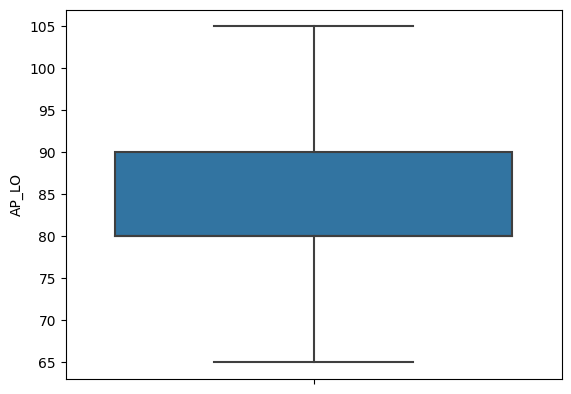

In [ ]:
sns.boxplot(y= "AP_LO", data = df)
plt.show()

In [ ]:
from scipy.stats import f_oneway

low_cholesterol=df[df['CHOLESTEROL']==1].CARDIO
high_cholesterol=df[df['CHOLESTEROL']==2].CARDIO
very_high_cholesterol = df[df['CHOLESTEROL']==3].CARDIO
f_statistic, p_value = f_oneway(low_cholesterol, high_cholesterol, very_high_cholesterol)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1799.6607856699602, P-Value: 0.0


In [ ]:
from scipy.stats import levene,ttest_ind
lower_age_group = df[df.AGE < df.AGE.mean()].CARDIO
higher_age_group = df[df.AGE >= df.AGE.mean()].CARDIO
#Levene’s Test is used to determine whether two or more groups have equal variances
f_stat, p_val = levene(lower_age_group,higher_age_group, center="mean")
print("Levene Test: f_Statistic: {0}, P_Value: {1}".format(f_stat,p_val))
#if p_value>0.05
f_statistic, p_value = ttest_ind(lower_age_group,
 higher_age_group, equal_var = p_value>0.05)
print("T-Test: F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


Levene Test: f_Statistic: 133.98315419526062, P_Value: 5.88006908232294e-31
T-Test: F_Statistic: -52.51350890203989, P-Value: 0.0


In [ ]:
from scipy.stats import pearsonr
#the Pearson correlation coefficient : he so tuong quan Pearson(coeff)
coeff, p_value = pearsonr(df.WEIGHT, df.CARDIO)
print("coeff:",coeff,"p_value:",p_value)


coeff: 0.1816594083445152 p_value: 0.0


In [ ]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df.ALCO, df.CARDIO)

chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=3.696547466479263, pvalue=0.05452518218322108, dof=1, expected_freq=array([[33137.8708, 33098.1292],
       [ 1883.1292,  1880.8708]]))

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

X = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE']]
X = sm.add_constant(X)
y = df['CARDIO']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CARDIO   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     1954.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:04:18   Log-Likelihood:                -41431.
No. Observations:               70000   AIC:                         8.289e+04
Df Residuals:                   69988   BIC:                         8.300e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6708      0.042    -39.948      0.000      -1.753      -1.589
AGE             0.0101      0.000     40.131      0.000       0.010       0.011
GENDER         -0.0041      0.004     -0.979      0.328      -0.012       0.004
HEIGHT         -0.0008      0.000     -3.229      0.001      -0.001      -0.000
WEIGHT          0.0021      0.000     16.542      0.000       0.002       0.002
AP_HI           0.0096      0.000     64.319      0.000       0.009       0.010
AP_LO           0.0040      0.000     14.993      0.000       0.003       0.005
CHOLESTEROL     0.0941      0.003     33.686      0.000       0.089       0.100
GLUC           -0.0207      0.003     -6.381      0.000      -0.027      -0.014
SMOKE          -0.0257      0.007     -3.953      0.000      -0.039      -0.013
ALCO           -0.0379      0.008     -4.840      0.000      -0.053      -0.023
ACTIVE         -0.0437      0.004    -10.487      0.000      -0.052      -0.036
==============================================================================
Omnibus:                    26450.210   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3466.466
Skew:                           0.049   Prob(JB):                         0.00
Kurtosis:                       1.914   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df[['AGE', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO']])





In [ ]:
import numpy as np
data = np.concatenate([data, df[['GENDER', 'CHOLESTEROL', 'GLUC', 'SMOKE', 'ALCO', 'ACTIVE', 'CARDIO']]], axis=1)

X = data[:,:11]
y = data[:,11]

print(X.shape,y.shape)

(70000, 11) (70000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha = 0.0001)
ridge.fit(X_train,y_train)


RidgeClassifier(alpha=0.0001)

In [ ]:
#Ridge Regression, the goal is to minimize the sum of squared residuals (similar to ordinary least squares regression), while also considering the addition of a regularization term
from sklearn.metrics import accuracy_score
y_hat = ridge.predict(X_test)
accuracy_score(y_test, y_hat)


0.7301428571428571

In [ ]:
# RandomForestClassifier : a wide range of classification tasks across different domains.
from sklearn.ensemble import RandomForestClassifier
rndF = RandomForestClassifier()
rndF.fit(X_train,y_train)
y_hat = rndF.predict(X_test)
accuracy_score(y_test, y_hat)


0.707047619047619

In [ ]:
#The GradientBoostingClassifier is a machine learning algorithm that belongs to the boosting family of algorithms. It is used for both classification and regression tasks.
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_hat = gbc.predict(X_test)
accuracy_score(y_test, y_hat)

0.7396190476190476

In [ ]:
#AdaBoostClassifier is an ensemble learning method that combines a series of weak classifiers to create a strong classifier.
from sklearn.ensemble import AdaBoostClassifier
adac = AdaBoostClassifier(n_estimators=100, random_state=0)
adac.fit(X_train, y_train)
#Evaluation
y_hat = adac.predict(X_test)
accuracy_score(y_test, y_hat)


0.7341428571428571

In [ ]:
#BaggingClassifier combines multiple instances of a base classifier to create a strong classifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggc = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggc.fit(X_train,y_train)
y_hat = baggc.predict(X_test)
accuracy_score(y_test, y_hat)


0.7235714285714285

In [ ]:
#The ExtraTreesClassifier algorithm is known for its ability to handle high-dimensional data, noisy data, and data with imbalanced class distributions.
from sklearn.ensemble import ExtraTreesClassifier
eTrc= ExtraTreesClassifier(n_estimators=100, random_state=0)
eTrc.fit(X_train,y_train)
y_hat = eTrc.predict(X_test)
accuracy_score(y_test, y_hat)

0.6938095238095238

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
estimators = [('ridge', RidgeClassifier()),
 ('knr', KNeighborsClassifier(n_neighbors=20,
 metric='euclidean'))]
final_estimator = GradientBoostingClassifier(
 n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
 random_state=42)
stackC = StackingClassifier(
 estimators=estimators,
 final_estimator=final_estimator)
stackC.fit(X_train,y_train)
y_hat = stackC.predict(X_test)
accuracy_score(y_test, y_hat)


0.7347619047619047